<a href="https://colab.research.google.com/github/yyic1203/Tesis/blob/main/HFHEGUP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Código base del Hartree-Fock Helio

  1     0.000000   -2.904000   100.000000
  2    -2.816317   -2.904000    3.019397
  3    -2.956847   -2.904000    1.819816
  4    -2.963999   -2.904000    2.066086
  5    -2.964398   -2.904000    2.079806
  6    -2.964420   -2.904000    2.080574
  7    -2.964421   -2.904000    2.080617
  8    -2.964421   -2.904000    2.080620
  9    -2.964421   -2.904000    2.080620
 10    -2.964421   -2.904000    2.080620
 11    -2.964421   -2.904000    2.080620
 12    -2.964421   -2.904000    2.080620
 13    -2.964421   -2.904000    2.080620
 14    -2.964421   -2.904000    2.080620


/tmp/ipython-input-18-2362971803.py:121: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


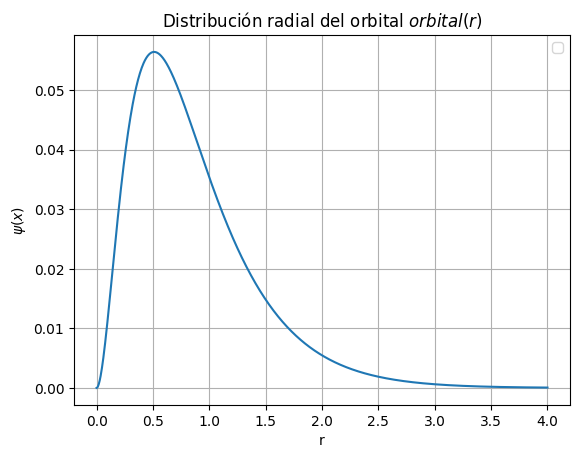

array([[-0.6384188 , -2.39732363],
       [-0.71286186,  0.18983854]])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

def find_X_and_X_dagger(S):
    # Diagonaliza S
    eigenvalues, U = eigh(S)

    # Construye D^{-1/2}
    D_inv_sqrt = np.diag(1.0 / np.sqrt(eigenvalues))

    # Matriz de transformación: X = U @ D^{-1/2} Descomposición de Cholesky
    X = U @ D_inv_sqrt

    X = X.T
    # Su transpuesta (es hermítica en este caso real)
    X_dag = X.T

    return X, X_dag

def autovector(FP):
    eigenvalues, CP = eigh(FP)
    return CP

def orbital_atom(r,zeta1,zeta2,c1,c2):
  return r**2*(c1*np.exp(-zeta1*r)+c2*np.exp(-zeta2*r))**2


# Parámetros iniciales
n = 2
Z = 2.0
re = -2.904

zeta = np.array([1.45363, 2.91093])
P = np.zeros((n, n))
S = np.zeros((n, n))
H = np.zeros((n, n))
G = np.zeros((n, n))
F = np.zeros((n, n))
C = np.zeros((n, n))
oldP = np.zeros((n, n))
tem = np.zeros((n, n))
T = np.zeros((n, n, n, n))

# Matriz de solapamiento
for i in range(n):
    for j in range(n):
        S[i, j] = (8.0 * (zeta[i]*zeta[j])**1.5) / (zeta[i]+zeta[j])**3

# Matriz H
for i in range(n):
    for j in range(n):
        H[i, j] = ((4.0 * (zeta[i]*zeta[j])**2.5) / (zeta[i]+zeta[j])**3 )- (4.0 * Z * (zeta[i]*zeta[j])**1.5) / (zeta[i]+zeta[j])**2

# Tensor de dos electrones
for i in range(n):
    for j in range(n):
        for k in range(n):
            for l in range(n):
                su = zeta[i] + zeta[j] + zeta[k] + zeta[l]
                mul = zeta[i]*zeta[j]*zeta[k]*zeta[l]
                T[i,j,k,l] = 16.0 * mul**1.5 * (
                    2.0 / ((zeta[i]+zeta[k])**3 * (zeta[j]+zeta[l])**2) -
                    2.0 / ((zeta[i]+zeta[k])**2 * su**3) -
                    2.0 / ((zeta[i]+zeta[k])**3 * su**2)
                )

# Ortogonalización
X, X_dag = find_X_and_X_dagger(S)

I=np.dot(np.dot(X_dag,S),X)

# Iteraciones
crit = 1e-15
iter = 0

while True:
    iter += 1
    G.fill(0.0)
    for i in range(n):
        for j in range(n):
            for k in range(n):
                for l in range(n):
                    G[i,j] += P[k,l]*(T[i,k,j,l] - 0.5*T[i,k,l,j])

    F.fill(0.0)
    F = H + G

    E = 0.5 * np.sum(P * (H + F))
    er = abs(E + 2.904) / 2.904 * 100

    tem=X_dag@F
    FP = tem@X
    CP = autovector(FP)
    C = X @ (CP.T)


    oldP = P.copy()
    P = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            for k in range(n):
                P[i,j] = 2.0 * C[k,i] * C[j,k]

    Delta = np.sum(np.abs(P - oldP))



    print(f"{iter:3d}    {E:9.6f}   {re:9.6f}   {er:9.6f}")

    if Delta < crit:
        break

r = np.linspace(0, 4, 1000)
y = orbital_atom(r, zeta[0], zeta[1],C[0,0],C[1,0])
plt.plot(r, y)

plt.title("Distribución radial del orbital $orbital(r)$")
plt.xlabel("r")
plt.ylabel(r"$\psi(x)$")
plt.legend()
plt.grid(True)
plt.show()

C

#Hartree-Fock GUP.

  1     0.000000   -2.904000   100.000000
  2     0.356354   -2.904000   112.271150
  3     0.352029   -2.904000   112.122194
  4     0.350051   -2.904000   112.054083
  5     0.349331   -2.904000   112.029320
  6     0.349079   -2.904000   112.020611
  7     0.348990   -2.904000   112.017575
  8     0.348960   -2.904000   112.016520
  9     0.348949   -2.904000   112.016153
 10     0.348945   -2.904000   112.016026
 11     0.348944   -2.904000   112.015981
 12     0.348944   -2.904000   112.015966
 13     0.348943   -2.904000   112.015961
 14     0.348943   -2.904000   112.015959
 15     0.348943   -2.904000   112.015958
 16     0.348943   -2.904000   112.015958
 17     0.348943   -2.904000   112.015958
 18     0.348943   -2.904000   112.015958
 19     0.348943   -2.904000   112.015958
 20     0.348943   -2.904000   112.015958
 21     0.348943   -2.904000   112.015958
 22     0.348943   -2.904000   112.015958


/tmp/ipython-input-27-199579577.py:126: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


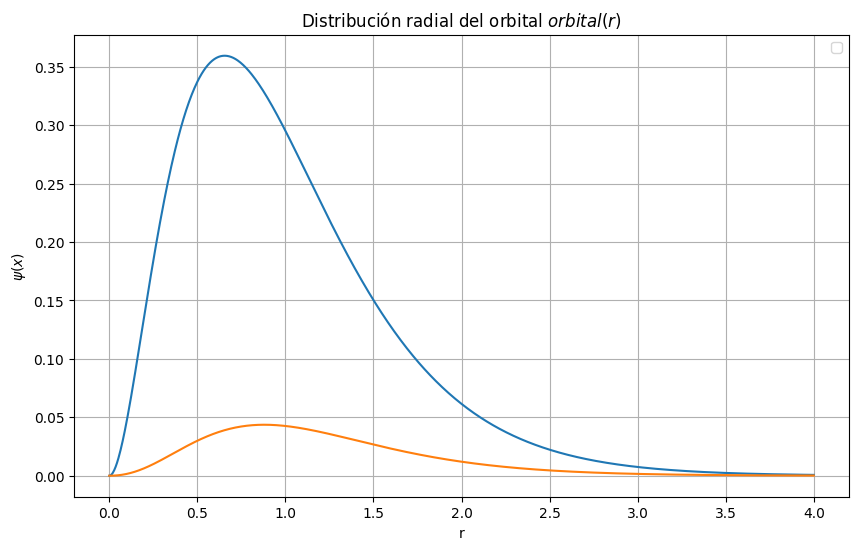

array([[-2.25289422, -1.03884878],
       [-0.30890935,  0.66991471]])

In [ ]:
import numpy as np
from scipy.linalg import eigh

def find_X_and_X_dagger(S):
    # Diagonaliza S
    eigenvalues, U = eigh(S)

    # Construye D^{-1/2}
    D_inv_sqrt = np.diag(1.0 / np.sqrt(eigenvalues))

    # Matriz de transformación: X = U @ D^{-1/2} @ U.T
    X = U @ D_inv_sqrt

    X = X.T
    # Su transpuesta (es hermítica en este caso real)
    X_dag = X.T

    return X, X_dag

def autovector(FP):
    eigenvalues, CP = eigh(FP)
    return CP

def orbital_atom(r,zeta1,zeta2,c1,c2):
  return r**2*(c1*np.exp(-zeta1*r)+c2*np.exp(-zeta2*r))**2

# Parámetros iniciales
n = 2
Z = 2.0
re = -2.904
a=3 #Parámetro de deformación

zeta = np.array([1.45363, 2.91093])
P = np.zeros((n, n))
S = np.zeros((n, n))
H = np.zeros((n, n))
G = np.zeros((n, n))
F = np.zeros((n, n))
C = np.zeros((n, n))
oldP = np.zeros((n, n))
tem = np.zeros((n, n))
T = np.zeros((n, n, n, n))

# Matriz de superposición
for i in range(n):
    for j in range(n):
        S[i, j] = (8.0 * (zeta[i]*zeta[j])**1.5) / (zeta[i]+zeta[j])**3

# Matriz H
for i in range(n):
    for j in range(n):
        H[i, j] = ((4.0 * (zeta[i]*zeta[j])**2.5) / (zeta[i]+zeta[j])**3 )- (4.0 * Z * (zeta[i]*zeta[j])**1.5) / (zeta[i]+zeta[j])**2 - ((144*zeta[j]**2*(zeta[i]*zeta[j])**1.5)/(5*(zeta[i]+zeta[j])**5))*a**2 +((84*zeta[j]*(zeta[i]*zeta[j])**1.5)/(5*(zeta[i]+zeta[j])**4))*a**2

# Tensor de dos electrones
for i in range(n):
    for j in range(n):
        for k in range(n):
            for l in range(n):
                su = zeta[i] + zeta[j] + zeta[k] + zeta[l]
                mul = zeta[i]*zeta[j]*zeta[k]*zeta[l]
                T[i,j,k,l] = 16.0 * mul**1.5 * (
                    2.0 / ((zeta[i]+zeta[k])**3 * (zeta[j]+zeta[l])**2) -
                    2.0 / ((zeta[i]+zeta[k])**2 * su**3) -
                    2.0 / ((zeta[i]+zeta[k])**3 * su**2)
                )

# Ortogonalización
X, X_dag = find_X_and_X_dagger(S)

I=np.dot(np.dot(X_dag,S),X)

# Iteraciones
crit = 1e-10
iter = 0

while True:
    iter += 1
    G.fill(0.0)
    for i in range(n):
        for j in range(n):
            for k in range(n):
                for l in range(n):
                    G[i,j] += P[k,l]*(T[i,k,j,l] - 0.5*T[i,k,l,j])

    F.fill(0.0)
    F = H + G

    E = 0.5 * np.sum(P * (H + F))
    er = abs(E + 2.904) / 2.904 * 100

    tem=X_dag@F
    FP = tem@X
    CP = autovector(FP)
    C = X @ (CP.T)


    oldP = P.copy()
    P = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            for k in range(n):
                P[i,j] = 2.0 * C[k,i] * C[j,k]

    Delta = np.sum(np.abs(P - oldP))



    print(f"{iter:3d}    {E:9.6f}   {re:9.6f}   {er:9.6f}")

    if Delta < crit:
        break

r = np.linspace(0, 4, 1000)
# Crear la figura
plt.figure(figsize=(10, 6))

y1 = orbital_atom(r, zeta[0], zeta[1],C[0,0],C[1,0])
plt.plot(r, y1)
y2 = orbital_atom(r, zeta[0], zeta[1],C[0,1],C[1,1])
plt.plot(r, y2)


plt.title("Distribución radial del orbital $orbital(r)$")
plt.xlabel("r")
plt.ylabel(r"$\psi(x)$")
plt.legend()
plt.grid(True)
plt.show()

C